# ECE 420 – Prelab 3: Fourier Transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

## Part 1 – Zero-padding and Windowing

### Assignment 1
Plot the squared-magnitude frequency response of the following test cases over the digital frequencies:

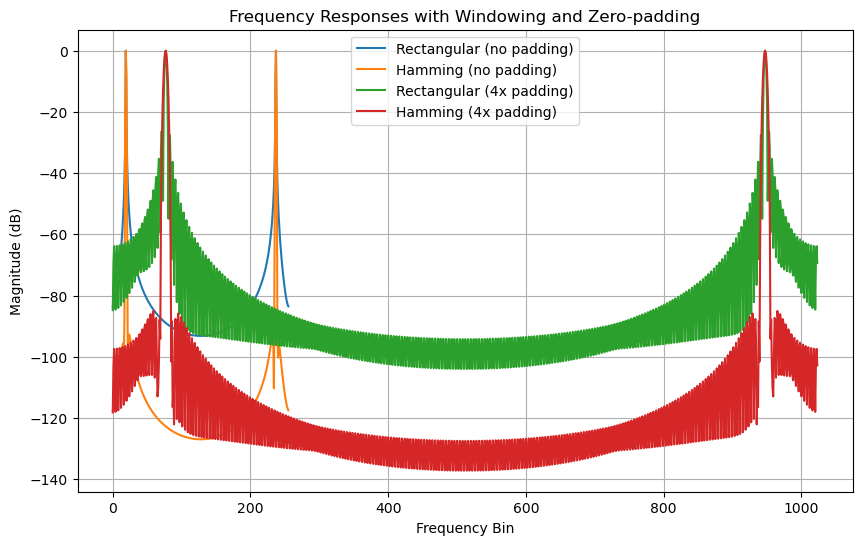

In [3]:
N = 256
num_freqs = 100
omega = np.pi/8 + np.linspace(0, num_freqs-1, num_freqs)/num_freqs*np.pi/4
S = np.zeros([1024, num_freqs])  # Large enough for zero-padding case

windows = {
    "Rectangular (no padding)": signal.boxcar(N),
    "Hamming (no padding)": signal.hamming(N),
    "Rectangular (4x padding)": signal.boxcar(N),
    "Hamming (4x padding)": signal.hamming(N)
}

fft_sizes = {
    "Rectangular (no padding)": N,
    "Hamming (no padding)": N,
    "Rectangular (4x padding)": 4*N,
    "Hamming (4x padding)": 4*N
}

plt.figure(figsize=(10,6))
for label, win in windows.items():
    fft_size = fft_sizes[label]
    s = np.sin(omega[10]*np.linspace(0, N-1, N)) * win  # example sine
    S = np.square(np.abs(np.fft.fft(s, n=fft_size)))
    plt.plot(20*np.log10(S/np.max(S)), label=label)

plt.title("Frequency Responses with Windowing and Zero-padding")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid()
plt.show()


**Question:**  
Describe the tradeoff between mainlobe width and sidelobe behavior for the various window functions. Does zero-padding increase frequency resolution? Are we getting something for free? What is the relationship between the DFT, X[k], and the DTFT, X(ω), of a sequence x[n]?

**Answer:**  
- Rectangular windows have a narrow mainlobe but high sidelobes, leading to spectral leakage.  
- Hamming windows have a wider mainlobe but much lower sidelobes, reducing leakage.  
- Zero-padding interpolates the DFT, giving smoother spectra and apparent higher resolution, but it does not increase the fundamental ability to separate frequencies.  
- The DFT is a sampled version of the DTFT. The DTFT is continuous in frequency, while the DFT samples it at equally spaced points.


## Part 2 – Resolving Close Frequencies

### Assignment 2
Generate a block of 256 samples of two sine waves (2000 Hz and 2100 Hz) with fs = 8000 Hz, then compute the FFT and plot the magnitude spectrum.


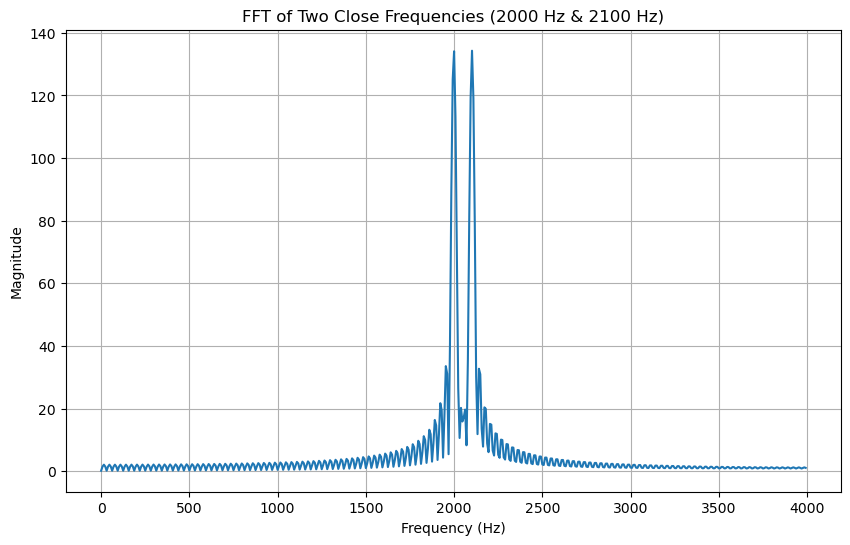

In [5]:
fs = 8000
N = 256
n = np.arange(N)

x = np.sin(2*np.pi*2000*n/fs) + np.sin(2*np.pi*2100*n/fs)

X = np.fft.fft(x, 1024)  # use zero-padding
freqs = np.fft.fftfreq(1024, d=1/fs)

plt.figure(figsize=(10,6))
plt.plot(freqs[:512], np.abs(X[:512]))
plt.title("FFT of Two Close Frequencies (2000 Hz & 2100 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


**Question:**  
What is the closest frequency to 2000 Hz that you can resolve using the Fourier transform method? Which method results in the best resolving capabilities? Why?

**Answer:**  
- With N=256 and fs=8000 Hz, the FFT bin spacing is fs/N = 31.25 Hz.  
- Therefore, the closest resolvable frequency to 2000 Hz is 2000 ± 31.25 Hz.  
- Zero-padding improves visualization but not actual resolution.  
- The Hamming window with zero-padding provides the best practical results because it reduces sidelobe leakage while showing clearer peaks.


## Part 3 – Short-time Spectral Analysis

### Assignment 3
Plot the spectrogram of the signal from Part 2 (two tones) and a frequency sweep signal, with **no overlap** and **50% overlap**. Use `plt.specgram`.


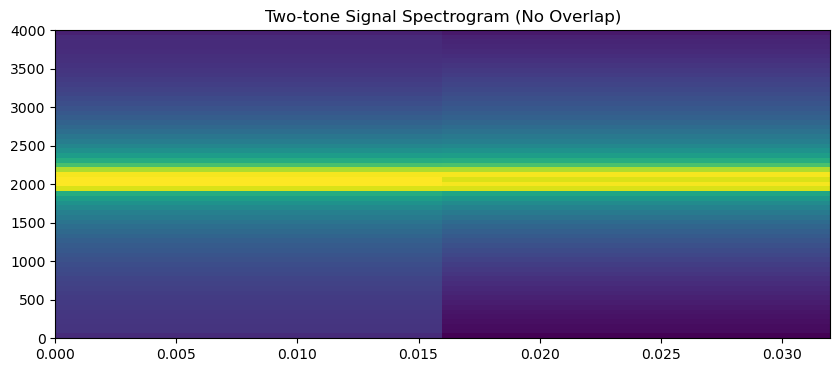

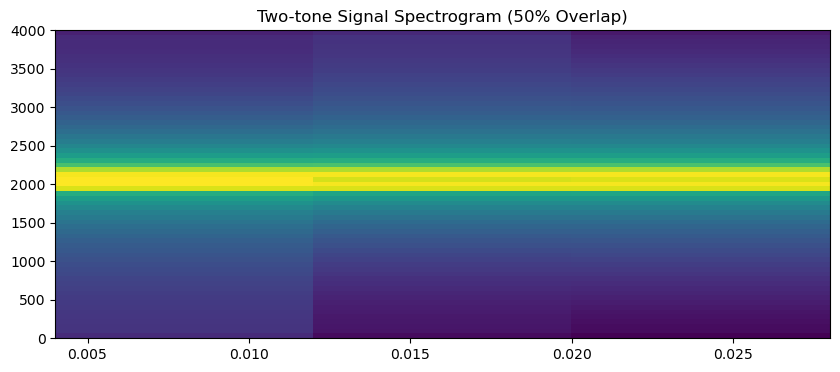

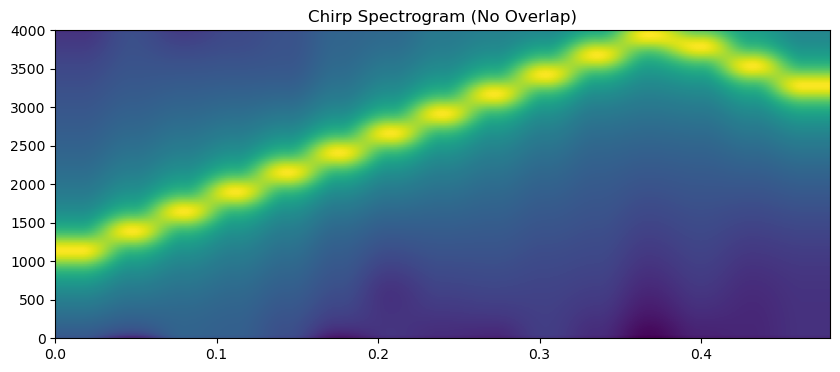

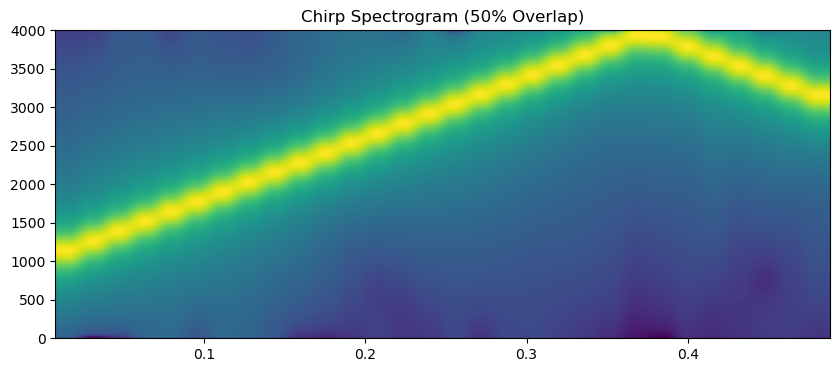

In [6]:
# Two-tone signal (from Part 2)
plt.figure(figsize=(10,4))
plt.specgram(x, NFFT=128, Fs=fs, noverlap=0)
plt.title("Two-tone Signal Spectrogram (No Overlap)")
plt.show()

plt.figure(figsize=(10,4))
plt.specgram(x, NFFT=128, Fs=fs, noverlap=64)
plt.title("Two-tone Signal Spectrogram (50% Overlap)")
plt.show()

# Frequency sweep
t = np.linspace(0,0.5,4001)
s = signal.chirp(t, f0=1000, f1=5000, t1=0.5)

plt.figure(figsize=(10,4))
plt.specgram(s, NFFT=256, Fs=fs, noverlap=0)
plt.title("Chirp Spectrogram (No Overlap)")
plt.show()

plt.figure(figsize=(10,4))
plt.specgram(s, NFFT=256, Fs=fs, noverlap=128)
plt.title("Chirp Spectrogram (50% Overlap)")
plt.show()


**Question:**  
How are the spectrograms different between no overlap and 50% overlap?

**Answer:**  
- With no overlap, the spectrogram has fewer time slices, appearing coarse and less smooth.  
- With 50% overlap, the spectrogram has finer time resolution and smoother transitions, making frequency changes easier to observe.  
- Overlap increases computational cost but provides a clearer picture of the time-frequency structure.
